# PAE asymmetry example on real data

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import json
import os

### Load the json file

In [3]:
def load_pae_from_json(json_file):
    """
    Load PAE matrix from ColabFold's JSON output file
    Use the json file for one of the models from ColabFold
    """
    with open(json_file) as f:
        data = json.load(f)
    
    if 'pae' in data:
        return np.array(data['pae'])
    elif 'predicted_aligned_error' in data:
        return np.array(data['predicted_aligned_error'])
    else:
        raise ValueError("Could not find PAE matrix in JSON file")

### Create the PAE matrix with the selected region highlighted with a blue rectangle

In [4]:
def visualize_pae_region(pae_matrix, region_start, region_end):
    """
    Visualize full PAE matrix with:
    - Blue rectangle highlighting selected region
    - Zoomed view with:
      * Green color scale
      * Annotated values
      * Red-bordered diagonal elements
    """
    # Convert to 0-based indexing
    start, end = region_start - 1, region_end - 1
    region = pae_matrix[start:end, start:end]
    size = end - start
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Full matrix overview
    sns.heatmap(pae_matrix, ax=ax1, cmap="Greens", vmin=0, vmax=30)
    rect = Rectangle((start, start), size, size,
                    linewidth=2, edgecolor='blue', facecolor='none')
    ax1.add_patch(rect)
    ax1.set_title(f"Full PAE Matrix (1-{len(pae_matrix)})")
    
    # 2. Zoomed region with diagonal highlighting
    sns.heatmap(region, ax=ax2, cmap="Greens", vmin=0, vmax=30,
                annot=True, fmt=".1f", annot_kws={"size": 8},
                linewidths=0.5, linecolor='lightgray')
    
    # Add red borders to diagonal
    for i in range(size):
        ax2.add_patch(Rectangle((i, i), 1, 1, 
                     fill=False, edgecolor='red', linewidth=2))
    
    ax2.set_title(f"Zoomed Region {region_start}-{region_end}")
    
    plt.tight_layout()
    plt.savefig('pae_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

### Ask the user for input (analysis region) and show the results

In [5]:
def interactive_analysis():
    """Interactive PAE matrix visualization tool"""
    print("PAE Matrix Visualization Tool with Region Selection")
    
    # File loading, just a single input here so input() is used
    while True:
        json_file = input("Path to ColabFold JSON file: ").strip()
        try:
            pae_matrix = load_pae_from_json(json_file)
            print(f"Loaded {len(pae_matrix)} residue matrix")
            break
        except Exception as e:
            print(f"Error: {e}")
    
    # Region selection
    while True:
        print(f"\nAvailable residues: 1-{len(pae_matrix)}")
        region_input = input("Analyze region (start-end) e.g. 20-30 or 'q' to quit: ")
        
        if region_input.lower() == 'q':
            break
        
        try:
            start, end = map(int, region_input.split('-'))
            if 1 <= start <= end <= len(pae_matrix):
                visualize_pae_region(pae_matrix, start, end)
            else:
                print(f"Enter values between 1-{len(pae_matrix)}")
        except ValueError:
            print("Use format 'start-end' (e.g. 30-50)")

### Run the analysis

PAE Matrix Visualization Tool with Region Selection
Loaded 666 residue matrix

Available residues: 1-666


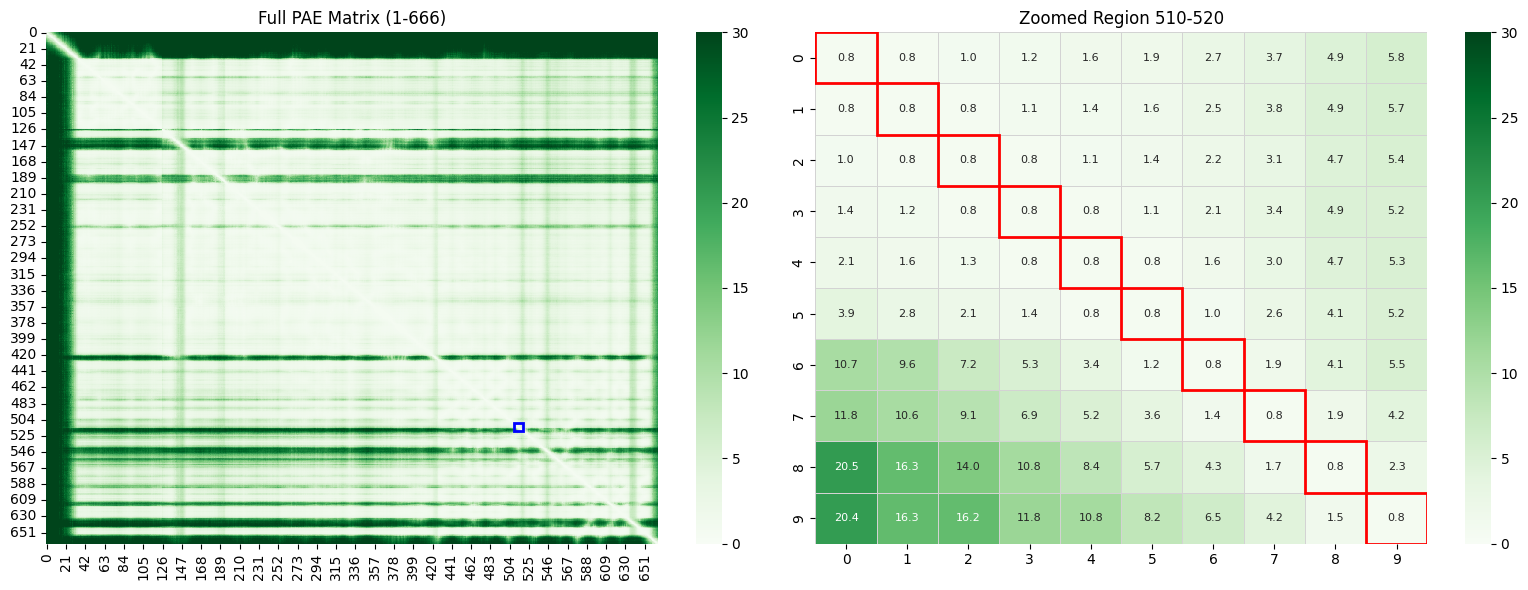


Available residues: 1-666


In [ ]:
interactive_analysis()